In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
import seaborn as sns

In [2]:
from google.colab import drive

drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [3]:
data_path="/content/gdrive/MyDrive/CVPR/CVPR/NN_Dataset.xlsx"

In [4]:
df = pd.read_excel(data_path)

df

,X,Y,Theta (degrees),Label
0,51.131393,-161.394580,287.578715,4.0
1,-149.709613,11.287667,175.688224,3.0
2,-121.813663,14.628644,173.152124,3.0
3,143.479508,49.474765,19.025275,1.0
4,38.314461,81.392880,64.792002,1.0
...,...,...,...,...
95,8.007574,155.072637,87.044011,2.0
96,97.197679,129.028591,53.009160,1.0
97,-102.304430,-25.562150,194.028886,3.0
98,44.240571,90.313584,63.901840,1.0


In [5]:
#Convert labels to integers, handling potential float values and NaNs
df["Label"] = df["Label"].fillna(0).astype(int) ## Convert NaN to 0, then to int

In [9]:
# Define normalization function to convert label to one-hot encoding
def normalize(input):
    encoding = [0, 0, 0, 0, 0]
    # Set the position of the class to 1
    if 1 <= input <= 5:
        encoding[input - 1] = 1
    return encoding

In [10]:
# Extract columns as lists
X1 = df["X"].values.tolist()
X2 = df["Y"].values.tolist()
Y = df["Label"].values.tolist()

In [11]:
features = list(zip(X1, X2))
features_np = np.array(features)

# Normalize the output labels to be one-hot encoded and convert to a numpy array
Y2 = np.array([normalize(i) for i in Y])

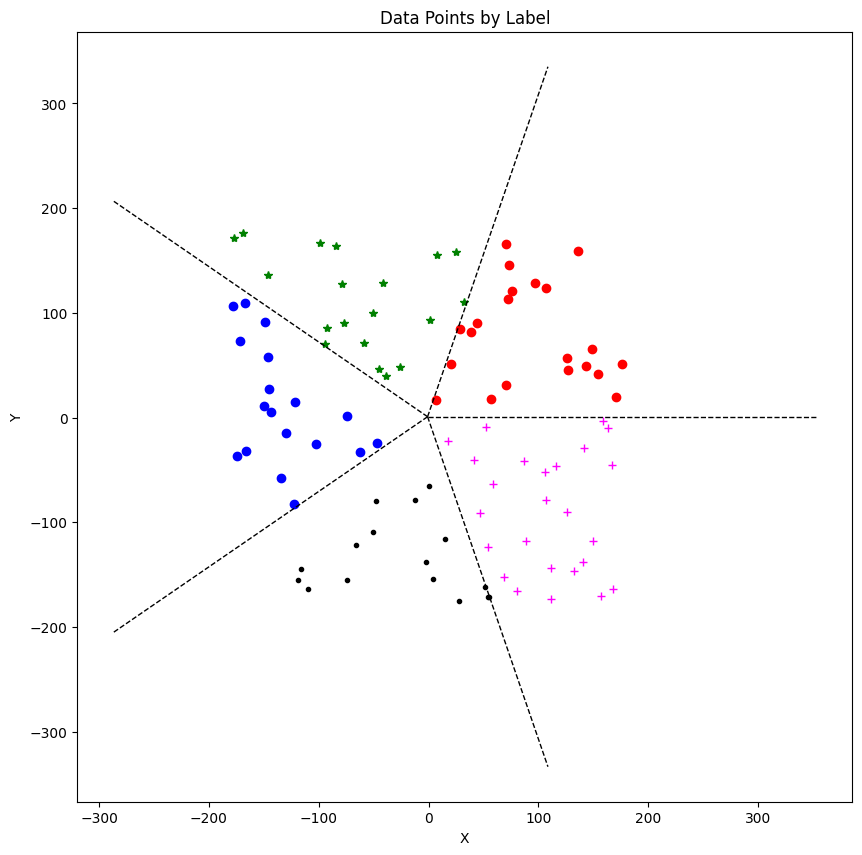

In [12]:
# Plotting all points
plt.figure(figsize=(10, 10))
for i in range(len(Y)):
    if Y[i] == 1:
        plt.plot(X1[i], X2[i], c="red", marker="o")
    elif Y[i] == 2:
        plt.plot(X1[i], X2[i], c="green", marker="*")
    elif Y[i] == 3:
        plt.plot(X1[i], X2[i], c="blue", marker="o")
    elif Y[i] == 4:
        plt.plot(X1[i], X2[i], c="black", marker=".")
    elif Y[i] == 5:
        plt.plot(X1[i], X2[i], c="magenta", marker="+")

# Calculate center point of the plot based on data range
center_x = (min(X1) + max(X1)) / 2
center_y = (min(X2) + max(X2)) / 2

# Draw lines from the center outward to visually partition the plot
for angle in np.linspace(0, 2 * np.pi, 5, endpoint=False):
    end_x = center_x + np.cos(angle) * (max(X1) - min(X1))  # Line length based on X range
    end_y = center_y + np.sin(angle) * (max(X2) - min(X2))  # Line length based on Y range
    plt.plot([center_x, end_x], [center_y, end_y], 'k--', linewidth=1)  # Dashed black lines

# Set plot labels and title
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Data Points by Label")
plt.show()

In [13]:
# dividing the total set into training (150) & testing (50) sets

features_train = features_np[:150]
Y2_train = Y2[:150]

features_test = features_np[50:]
Y2_test = Y2[50:]

In [18]:
class NeuralNetwork(object):
    def __init__(self):
        inputLayerNeurons = 2
        hiddenLayerNeurons1 = 200
        hiddenLayerNeurons2 = 20
        outLayerNeurons = 5

        self.learning_rate = 0.2
        self.W_HI = np.random.randn(inputLayerNeurons, hiddenLayerNeurons1)
        self.W_MI = np.random.randn(hiddenLayerNeurons1, hiddenLayerNeurons2)
        self.W_OH = np.random.randn(hiddenLayerNeurons2, outLayerNeurons)

    def sigmoid(self, x, der=False):
        if der == True:
            return x * (1-x)
        else:
            return 1 / (1 + np.exp(-x))

    def feedForward(self, X):
        hidden_input1 = np.dot(X, self.W_HI)
        self.hidden_output1 = self.sigmoid(hidden_input1)

        hidden_input2 = np.dot(self.hidden_output1, self.W_MI)
        self.hidden_output2 = self.sigmoid(hidden_input2)

        output_input = np.dot(self.hidden_output2, self.W_OH)
        pred = self.sigmoid(output_input)
        return pred

    def backPropagation(self, X, Y, pred):
        output_error = Y - pred
        output_delta = self.learning_rate * output_error * self.sigmoid(pred, der=True)

        hidden_error1 = output_delta.dot(self.W_OH.T)
        hidden_delta1 = self.learning_rate * hidden_error1 * self.sigmoid(self.hidden_output2, der=True)

        hidden_error2 = hidden_delta1.dot(self.W_MI.T)
        hidden_delta2 = self.learning_rate * hidden_error2 * self.sigmoid(self.hidden_output1, der=True)

        self.W_HI += X.T.dot(hidden_delta2)
        self.W_MI += self.hidden_output1.T.dot(hidden_delta1)
        self.W_OH += self.hidden_output2.T.dot(output_delta)

    def train(self, X, Y):
        output = self.feedForward(X)
        self.backPropagation(X,Y,output)

<ipython-input-18-73353b50a621>:17: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


Epoch: 0, error: 0.17376350525786613
Epoch: 1000, error: 0.0005461930964422783
Epoch: 2000, error: 3.969127603037319e-05
Epoch: 3000, error: 2.1821003643497023e-05
Epoch: 4000, error: 1.513300334016837e-05
Epoch: 5000, error: 1.1623213202073899e-05
Epoch: 6000, error: 9.447233883823388e-06
Epoch: 7000, error: 7.961768014462278e-06
Epoch: 8000, error: 6.882426967139307e-06
Epoch: 9000, error: 6.0608791709025e-06


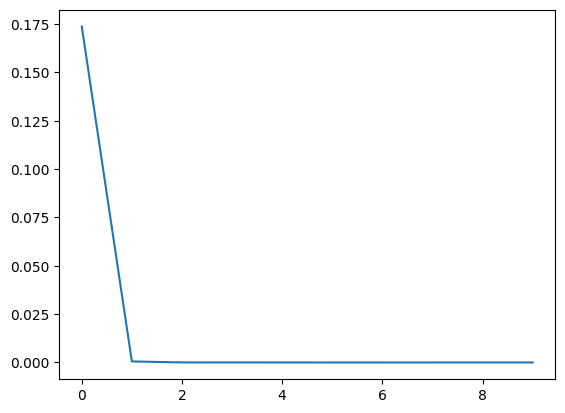

In [19]:
NN = NeuralNetwork()

err_list = []

for i in range(10000):
    NN.train(features_train,Y2_train)
    err = np.mean(np.square(Y2_train - NN.feedForward(features_train)))

    if i % 1000 == 0:
        err_list.append(err)
        print(f'Epoch: {i}, error: {err}')

plt.plot(err_list)
plt.show()

In [20]:
# stores a dict with the probability of each class with its class name

def getProb(pred):
    return {f'Class-{index}': p*100 for index, p in enumerate(pred)}
# returns the dict key with the highest probablity

def getClass(dict):
    max_key = max(dict, key=dict.get)
    return (max_key)

In [21]:
# testing a random input

pred = NN.feedForward([75,-33])
print(pred)
print(getProb(pred))
print(getClass(getProb(pred)))

[9.45129830e-04 2.90575500e-07 9.82076175e-05 2.73546907e-03
 9.95364427e-01]
{'Class-0': 0.09451298303425473, 'Class-1': 2.905754997425047e-05, 'Class-2': 0.009820761748530433, 'Class-3': 0.2735469070302066, 'Class-4': 99.53644272526144}
Class-4


In [22]:
## Performance matrix

predictions = NN.feedForward(features_test)

# Calculate recall and F1 score
Y_true = np.argmax(Y2_test, axis=1)
Y_pred = np.argmax(predictions, axis=1)

accuracy = accuracy_score(Y_true, Y_pred)
print(f"Overall Accuracy: {accuracy}")

precision = precision_score(Y_true, Y_pred, average=None)
print("Precision for each class:")
for i, score in enumerate(precision):
    print(f"Class {i}: {score}")

recall = recall_score(Y_true, Y_pred, average='macro')
print(f"Recall: {recall}")

f1 = f1_score(Y_true, Y_pred, average='macro')
print(f"F1 Score overall: {f1}")

Overall Accuracy: 1.0
Precision for each class:
Class 0: 1.0
Class 1: 1.0
Class 2: 1.0
Class 3: 1.0
Class 4: 1.0
Recall: 1.0
F1 Score overall: 1.0


<ipython-input-18-73353b50a621>:17: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


In [23]:
# f1 score for each class

f1_scores = f1_score(Y_true, Y_pred, average=None)

print("F1 Scores for each class:")
for i, score in enumerate(f1_scores):
    print(f"Class {i}: {score}")

F1 Scores for each class:
Class 0: 1.0
Class 1: 1.0
Class 2: 1.0
Class 3: 1.0
Class 4: 1.0
